In [253]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='darkgrid')
pd.reset_option('max_rows')

In [254]:
df = pd.read_csv("data/ufc-master.csv")
df

,R_fighter,B_fighter,R_odds,B_odds,R_ev,B_ev,date,location,country,Winner,...,finish_details,finish_round,finish_round_time,total_fight_time_secs,r_dec_odds,b_dec_odds,r_sub_odds,b_sub_odds,r_ko_odds,b_ko_odds
0,Thiago Santos,Johnny Walker,-150.0,130,66.666667,130.000000,2021-10-02,"Las Vegas, Nevada, USA",USA,Red,...,NaN,5.0,5:00,1500.0,800.0,900.0,2000.0,1600.0,-110.0,175.0
1,Alex Oliveira,Niko Price,170.0,-200,170.000000,50.000000,2021-10-02,"Las Vegas, Nevada, USA",USA,Blue,...,NaN,3.0,5:00,900.0,450.0,350.0,700.0,1100.0,550.0,120.0
2,Misha Cirkunov,Krzysztof Jotko,110.0,-130,110.000000,76.923077,2021-10-02,"Las Vegas, Nevada, USA",USA,Blue,...,NaN,3.0,5:00,900.0,550.0,275.0,275.0,1400.0,600.0,185.0
3,Alexander Hernandez,Mike Breeden,-675.0,475,14.814815,475.000000,2021-10-02,"Las Vegas, Nevada, USA",USA,Red,...,Punch,1.0,1:20,80.0,175.0,900.0,500.0,3500.0,110.0,1100.0
4,Joe Solecki,Jared Gordon,-135.0,115,74.074074,115.000000,2021-10-02,"Las Vegas, Nevada, USA",USA,Blue,...,NaN,3.0,5:00,900.0,165.0,200.0,400.0,1200.0,900.0,600.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4891,Duane Ludwig,Darren Elkins,-155.0,135,64.516129,135.000000,3/21/2010,"Broomfield, Colorado, USA",USA,Blue,...,NaN,1.0,0:44,44.0,NaN,NaN,NaN,NaN,NaN,NaN
4892,John Howard,Daniel Roberts,-210.0,175,47.619048,175.000000,3/21/2010,"Broomfield, Colorado, USA",USA,Red,...,Punch,1.0,2:01,121.0,NaN,NaN,NaN,NaN,NaN,NaN
4893,Brendan Schaub,Chase Gormley,-260.0,220,38.461538,220.000000,3/21/2010,"Broomfield, Colorado, USA",USA,Red,...,Punches,1.0,0:47,47.0,NaN,NaN,NaN,NaN,NaN,NaN
4894,Mike Pierce,Julio Paulino,-420.0,335,23.809524,335.000000,3/21/2010,"Broomfield, Colorado, USA",USA,Red,...,NaN,3.0,5:00,900.0,NaN,NaN,NaN,NaN,NaN,NaN


In [255]:
df.shape

(4896, 119)

In [256]:
# pd.set_option('display.max_rows', None) 
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4896 entries, 0 to 4895
Data columns (total 119 columns):
 #    Column                        Dtype  
---   ------                        -----  
 0    R_fighter                     object 
 1    B_fighter                     object 
 2    R_odds                        float64
 3    B_odds                        int64  
 4    R_ev                          float64
 5    B_ev                          float64
 6    date                          object 
 7    location                      object 
 8    country                       object 
 9    Winner                        object 
 10   title_bout                    bool   
 11   weight_class                  object 
 12   gender                        object 
 13   no_of_rounds                  int64  
 14   B_current_lose_streak         int64  
 15   B_current_win_streak          int64  
 16   B_draw                        int64  
 17   B_avg_SIG_STR_landed          float64
 18   B_avg_

In [257]:
# print(df.isnull().sum())


# df[df["r_ko_odds"].isnull()]
df.isnull().sum().sort_values(ascending=False)


B_Women's Featherweight_rank    4896
R_Women's Featherweight_rank    4889
B_Pound-for-Pound_rank          4861
B_Women's Flyweight_rank        4852
R_Women's Flyweight_rank        4837
                                ... 
R_longest_win_streak               0
R_draw                             0
R_current_win_streak               0
R_current_lose_streak              0
R_Weight_lbs                       0
Length: 119, dtype: int64

In [258]:
df.describe()

,R_odds,B_odds,R_ev,B_ev,no_of_rounds,B_current_lose_streak,B_current_win_streak,B_draw,B_avg_SIG_STR_landed,B_avg_SIG_STR_pct,...,B_Flyweight_rank,B_Pound-for-Pound_rank,finish_round,total_fight_time_secs,r_dec_odds,b_dec_odds,r_sub_odds,b_sub_odds,r_ko_odds,b_ko_odds
count,4895.000000,4896.000000,4895.000000,4896.000000,4896.000000,4896.000000,4896.000000,4896.000000,3966.000000,4131.000000,...,95.000000,35.000000,4274.000000,4274.000000,4093.000000,4077.000000,3847.000000,3835.000000,3847.000000,3834.000000
mean,-117.640449,66.030637,94.827397,167.083323,3.181985,0.477941,0.875408,0.010621,26.308553,0.444741,...,8.473684,9.485714,2.408049,652.313758,294.064745,416.544027,843.010138,1064.543155,514.231869,647.257173
std,268.881452,247.803928,82.843409,136.944643,0.571515,0.769386,1.311379,0.108333,20.935885,0.121332,...,4.259763,4.300283,0.996643,357.911423,230.583958,306.571299,550.126761,627.285034,413.622768,458.846643
min,-1700.000000,-1200.000000,5.882353,8.333333,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,2.000000,1.000000,5.000000,-440.000000,-200.000000,-370.000000,-1250.000000,-550.000000,-275.000000
25%,-255.000000,-145.000000,39.215686,68.965517,3.000000,0.000000,0.000000,0.000000,5.610000,0.387500,...,5.000000,5.000000,1.000000,297.000000,167.000000,225.000000,435.000000,590.000000,240.000000,325.000000
50%,-150.000000,130.000000,66.666667,130.000000,3.000000,0.000000,0.000000,0.000000,24.759615,0.450000,...,8.000000,10.000000,3.000000,900.000000,250.000000,349.000000,720.000000,975.000000,435.000000,548.500000
75%,126.500000,220.000000,126.500000,220.000000,3.000000,1.000000,1.000000,0.000000,39.075000,0.510000,...,12.000000,13.500000,3.000000,900.000000,400.000000,525.000000,1200.000000,1400.000000,700.000000,880.750000
max,775.000000,1300.000000,775.000000,1300.000000,5.000000,6.000000,12.000000,2.000000,154.000000,1.000000,...,15.000000,15.000000,5.000000,1500.000000,2200.000000,2600.000000,4665.000000,4785.000000,2675.000000,3200.000000


In [259]:
df.duplicated().sum()

0

In [260]:
all_fighters_df = pd.concat([df.R_fighter, df.B_fighter], ignore_index = True) # Combine fighter names from two columns into one
all_fighters_nbr = all_fighters_df.nunique() # Check how many unique names there are
print(all_fighters_nbr)

1749


Text(0.5, 0, 'Finish')

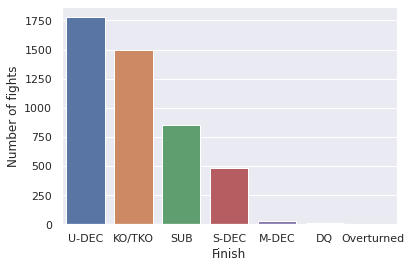

In [261]:
sns.countplot(data=df , x='finish', order = df['finish'].value_counts().index)
plt.ylabel('Number of fights')
plt.xlabel('Finish')

Text(0, 0.5, 'Finish technique')

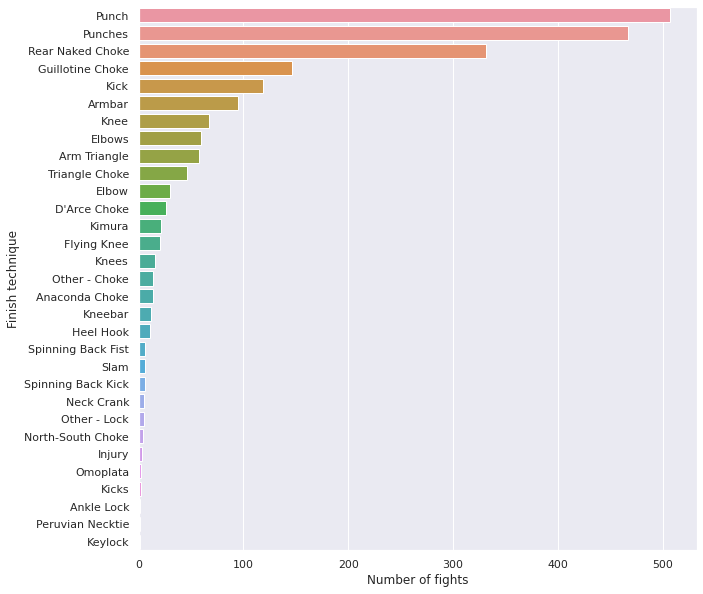

In [262]:

plt.figure(figsize=(10, 10))
sns.countplot(data=df , y='finish_details', order = df['finish_details'].value_counts().index)

plt.xlabel('Number of fights')
plt.ylabel('Finish technique')

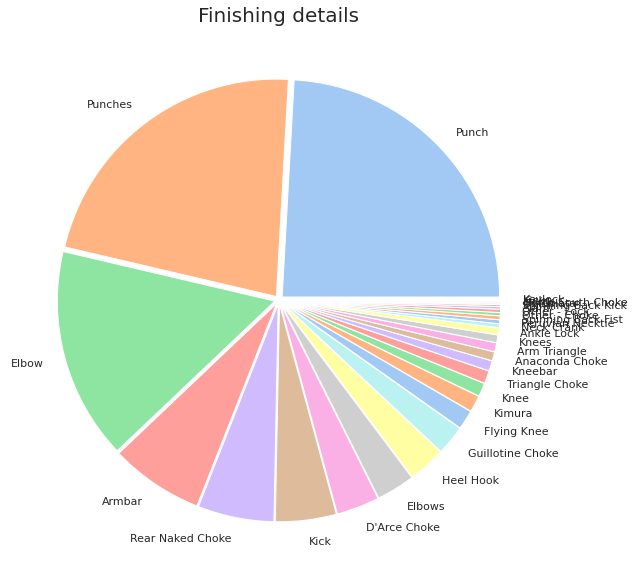

In [263]:
n_details = len(df['finish_details'].unique())
labels = list(df['finish_details'].unique())
size = df['finish_details'].value_counts()
explode = [0.02 for i in range(n_details-1)]
colors = sns.color_palette('pastel')


plt.figure(figsize=(10, 10))
plt.pie(size, labels = labels[1:], explode=explode, colors=colors)
plt.title('Finishing details', fontsize = 20)
plt.show()

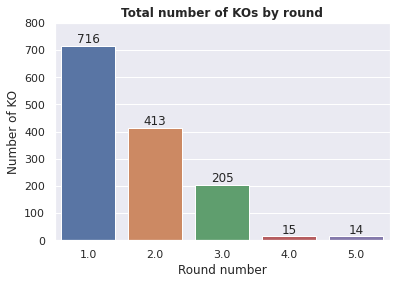

In [264]:
kos_by_round = df[['finish', 'finish_round']].query('finish == "KO/TKO"')
kos = sns.countplot(x = kos_by_round['finish_round']);
plt.title('Total number of KOs by round', weight = 'bold')
plt.xlabel('Round number')
plt.ylabel('Number of KO')
plt.ylim([0,800])
plt.bar_label(kos.containers[0])
plt.text(x = 3, y = 800, s = '');

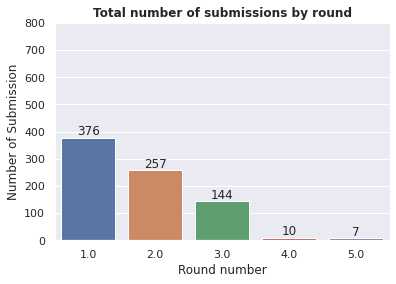

In [265]:
subs_by_round = df[['finish', 'finish_round']].query('finish == "SUB"')
subs = sns.countplot(x = subs_by_round['finish_round']);
plt.title('Total number of submissions by round', weight = 'bold')
plt.xlabel('Round number')
plt.ylabel('Number of Submission')
plt.ylim([0,800])
plt.bar_label(subs.containers[0])
plt.text(x = 3, y = 800, s = '');

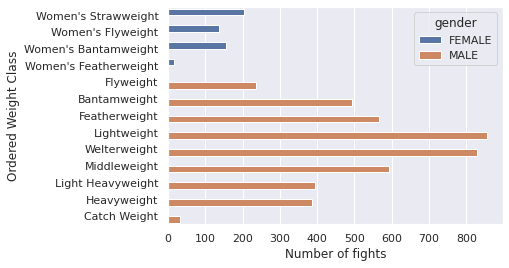

In [266]:
# Order the weight classes
# print(df['weight_class'].unique())
weight_class_order = ["Women's Strawweight", "Women's Flyweight", "Women's Bantamweight", "Women's Featherweight",
                      "Flyweight", "Bantamweight", "Featherweight", "Lightweight", "Welterweight", 
                      "Middleweight", "Light Heavyweight", "Heavyweight", "Catch Weight"]
# Add it as new categorical columns
df['ordered_weight_class'] = pd.Categorical(df['weight_class'], weight_class_order)
df['ordered_weight_class']


sns.countplot(data=df.sort_values('ordered_weight_class') , y = 'ordered_weight_class' , hue ='gender')
plt.xlabel('Number of fights')
plt.ylabel('Ordered Weight Class')
plt.show();